<a href="https://colab.research.google.com/github/Naveena01/COVID-19/blob/master/COVID_DETECTION_USING_AUGUMENTED_DATA_WITH_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##COVID 19 Detection using Lung x-rays Using SVM along with sophisticated Image processing tools

In [ ]:
# cloning the Covid image data set to my colab
!git clone https://github.com/garlaptikavya/covid.git

Cloning into 'covid'...
remote: Enumerating objects: 1827, done.
remote: Total 1827 (delta 0), reused 0 (delta 0), pack-reused 1827
Receiving objects: 100% (1827/1827), 96.09 MiB | 32.49 MiB/s, done.


In [ ]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

###Applying different filters to know which is better for feature extraction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


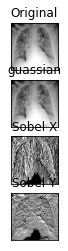

In [ ]:
img=cv2.imread("/content/covid/X-Ray Image DataSet/Covid-19/COVID-19 (462).jpg")

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
guassian = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(4,1,1),
plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(4,1,2)
plt.imshow(guassian)
plt.title('guassian'), plt.xticks([]), plt.yticks([])
plt.subplot(4,1,3),
plt.imshow(sobelx)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(4,1,4),
plt.imshow(sobely)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])


plt.show()

(Text(0.5, 1.0, 'Original'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

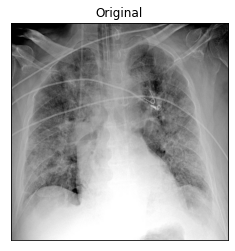

In [ ]:
plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'guassian'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

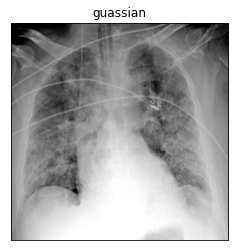

In [ ]:
plt.imshow(guassian)
plt.title('guassian'), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sobel X'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

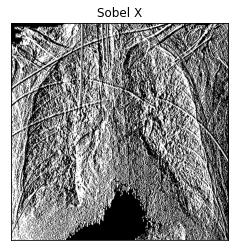

In [ ]:
plt.imshow(sobelx)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

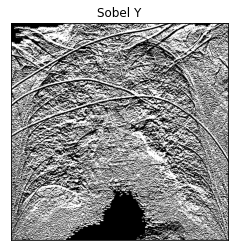

In [ ]:
plt.imshow(sobely)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

### Here we are using **Flow2Ml** package which will apply filters on images and gives us the train and test split


In [ ]:
#Instaling Flow2ml
!pip install flow2ml==1.0.3
import flow2ml as f2m
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score

  Created wheel for flow2ml: filename=flow2ml-1.0.3-cp37-none-any.whl size=5905 sha256=e1e2a6c49abb8d0680c2603fda48305b446b9c6c129b2b01a05db8db3a509c79
  Stored in directory: /root/.cache/pip/wheels/f5/6e/85/628296efb806cb4a24391b33afee72e89f0fa4481663538b66
Successfully built flow2ml


In [ ]:
#setting image dimensions to reshape and giving test split
img_dimensions = (250,250,3)
test_val_split = 0.3

# directed to folder where filters need to be applied
flow = f2m.Flow( 'covid' , 'X-Ray Image DataSet' )

# defining requried filters to apply
filters = ["sobelx", "sobely"]

#applying filters to Images
flow.applyFilters( filters )

# Obtain Train, Validation data splits
(train_x, train_y, val_x, val_y) = flow.getDataset( img_dimensions, test_val_split )

Flow2Ml: [##########] 100% Filtered all images in Covid-19 ...
Flow2Ml: [##########] 100% Filtered all images in No_findings ...

Flow2Ml: [##########] 100% Created Datasets ...


In [ ]:
print("Initial data shape : \n")

print(f"Train x shape {train_x.shape}")
print(f"Train y shape {train_y.shape}")
print(f"Validation x shape {val_x.shape}")
print(f"Validation y shape {val_y.shape}")


tx = train_x.reshape(2553,250*250*3)
vx = val_x.reshape(1095,250*250*3)

ty = np.where(train_y==1)[1]
vy = np.where(val_y==1)[1]

print("\nData shape after reshaping and removing one hot : \n")

print(f"Train x shape {tx.shape}")
print(f"Train y shape {ty.shape}")
print(f"Validation x shape {vx.shape}")
print(f"Validation y shape {vy.shape}")

Initial data shape : 

Train x shape (2553, 250, 250, 3)
Train y shape (2553, 2)
Validation x shape (1095, 250, 250, 3)
Validation y shape (1095, 2)

Data shape after reshaping and removing one hot : 

Train x shape (2553, 187500)
Train y shape (2553,)
Validation x shape (1095, 187500)
Validation y shape (1095,)


###Fitting our data in **SVM** model and getting the train and validation accuracy

In [ ]:
# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(tx,ty)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predict the response for test dataset
y_pred = clf.predict(vx)

# Training Accuracy
train_pred = clf.predict(tx)
acc = accuracy_score(ty, train_pred)
print('Training accuracy is: ', acc)

# Validation Accuracy
val_acc = accuracy_score(vy, y_pred)
print('Validation accuracy is: ', val_acc)

Training accuracy is:  1.0
Validation accuracy is:  0.9872146118721461


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

SVM Classifier train score:
 100.0
SVM Classifier Test score:
 98.72
Accuracy:
 0.9872146118721461
Confusion Matrix:
 [[556   4]
 [ 10 525]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       560
           1       0.99      0.98      0.99       535

    accuracy                           0.99      1095
   macro avg       0.99      0.99      0.99      1095
weighted avg       0.99      0.99      0.99      1095

Recall: 
 0.9813084112149533
Precision: 0.9924385633270322
F1 Score: 0.9868421052631579
Roc Auc Score: 0.9870827770360481


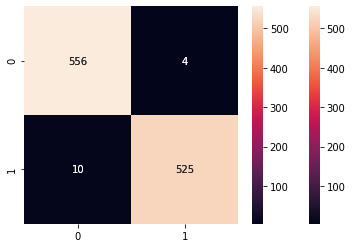

In [ ]:
print('SVM Classifier train score:\n',clf_score)
print('SVM Classifier Test score:\n',clf_score_test)
print('Accuracy:\n',accuracy_score(vy,y_pred))
print('Confusion Matrix:\n',confusion_matrix(vy,y_pred))
print('Classification Report:\n',classification_report(vy,y_pred))
print('Recall: \n',recall_score(vy,y_pred))
print("Precision:",precision_score(vy,y_pred))
print("F1 Score:",f1_score(vy,y_pred))
print("Roc Auc Score:",roc_auc_score(vy,y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix(vy,y_pred),annot=True,fmt="d")
sns.heatmap(confusion_matrix(vy,y_pred),annot=True,fmt="d")